In [2]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix

In [3]:
counts = csr_matrix(np.random.poisson(1, size=(100, 2000)), dtype=np.float32)
adata = ad.AnnData(counts)
adata

AnnData object with n_obs × n_vars = 100 × 2000

In [4]:
adata.X

<100x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 126318 stored elements in Compressed Sparse Row format>

In [7]:
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]
adata.var_names = [f"Gene_{i:d}" for i in range(adata.n_vars)]
print(adata.var_names[:10])
print(adata.obs_names[:10])

Index(['Gene_0', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5', 'Gene_6',
       'Gene_7', 'Gene_8', 'Gene_9'],
      dtype='object')
Index(['Cell_0', 'Cell_1', 'Cell_2', 'Cell_3', 'Cell_4', 'Cell_5', 'Cell_6',
       'Cell_7', 'Cell_8', 'Cell_9'],
      dtype='object')


In [8]:
ct = np.random.choice(["B", "T", "Monocyte"], size=(adata.n_obs,)) # Simulate cell types
adata.obs["cell_type"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
adata.obs


,cell_type
Cell_0,T
Cell_1,Monocyte
Cell_2,B
Cell_3,B
Cell_4,B
...,...
Cell_95,Monocyte
Cell_96,T
Cell_97,T
Cell_98,T


In [9]:
adata

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'cell_type'

In [22]:
adata.obsm["X_map"] = np.random.normal(size=(adata.n_obs, 2))
adata.varm["gene_stuff"] = np.random.normal(size=(adata.n_vars, 5))


In [23]:
adata.uns["random"] = [1, 2, 3]
adata.uns

OrderedDict([('random', [1, 2, 3])])

In [24]:
adata.layers["log_transformed"] = np.log1p(adata.X)
adata

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'cell_type'
    uns: 'random'
    obsm: 'X_map'
    varm: 'gene_stuff'
    layers: 'log_transformed'

In [25]:
adata.to_df(layer="log_transformed")

,Gene_0,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,...,Gene_1990,Gene_1991,Gene_1992,Gene_1993,Gene_1994,Gene_1995,Gene_1996,Gene_1997,Gene_1998,Gene_1999
Cell_0,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,0.000000,1.386294,0.693147,0.693147,...,0.693147,0.000000,0.000000,0.693147,1.098612,0.000000,0.000000,0.693147,0.000000,0.693147
Cell_1,0.693147,1.386294,0.000000,0.693147,0.693147,1.791759,0.000000,0.000000,0.000000,0.693147,...,0.000000,1.098612,0.000000,1.098612,0.693147,0.693147,0.693147,1.386294,1.098612,0.000000
Cell_2,0.000000,1.098612,0.693147,0.000000,0.000000,1.386294,1.098612,0.693147,1.098612,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,0.693147,0.000000
Cell_3,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147,...,0.693147,0.000000,0.693147,1.098612,0.693147,0.693147,1.098612,0.693147,1.386294,1.098612
Cell_4,0.693147,1.386294,1.386294,0.000000,0.693147,1.098612,0.000000,0.693147,0.693147,0.693147,...,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,1.098612,1.386294,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell_95,0.000000,0.693147,1.098612,0.000000,0.000000,0.000000,0.693147,1.386294,0.693147,1.386294,...,1.098612,1.386294,0.000000,0.693147,1.386294,1.098612,0.693147,0.693147,1.098612,0.693147
Cell_96,1.098612,0.693147,0.693147,0.000000,0.693147,0.693147,0.693147,1.098612,0.000000,0.000000,...,0.693147,0.693147,0.000000,1.098612,0.693147,1.386294,0.000000,1.098612,1.098612,1.098612
Cell_97,0.000000,0.000000,1.098612,0.000000,0.000000,0.693147,0.693147,1.386294,0.000000,0.693147,...,1.386294,0.000000,0.000000,0.000000,1.386294,0.693147,1.609438,0.000000,1.386294,0.693147
Cell_98,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,...,0.693147,0.000000,0.000000,1.386294,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000


In [26]:
adata.write("my_results.h5ad", compression="gzip")

In [27]:
!h5ls 'my_results.h5ad'

X                        Group
layers                   Group
obs                      Group
obsm                     Group
obsp                     Group
uns                      Group
var                      Group
varm                     Group
varp                     Group


In [28]:
adata_new = ad.read_h5ad("my_results.h5ad")
adata_new

AnnData object with n_obs × n_vars = 100 × 2000
    obs: 'cell_type'
    uns: 'random'
    obsm: 'X_map'
    varm: 'gene_stuff'
    layers: 'log_transformed'

In [29]:
import scanpy as sc

sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.9 umap==0.5.6 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 pynndescent==0.5.13


In [30]:
adata = sc.datasets.pbmc3k()
adata

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [32]:
# 查看基因总数
num_genes = adata.var.shape[0]
print(f"总共有 {num_genes} 种基因")

# 查看唯一基因的总数
unique_genes = adata.var_names.nunique()
print(f"总共有 {unique_genes} 种唯一基因")


总共有 32738 种基因
总共有 32738 种唯一基因


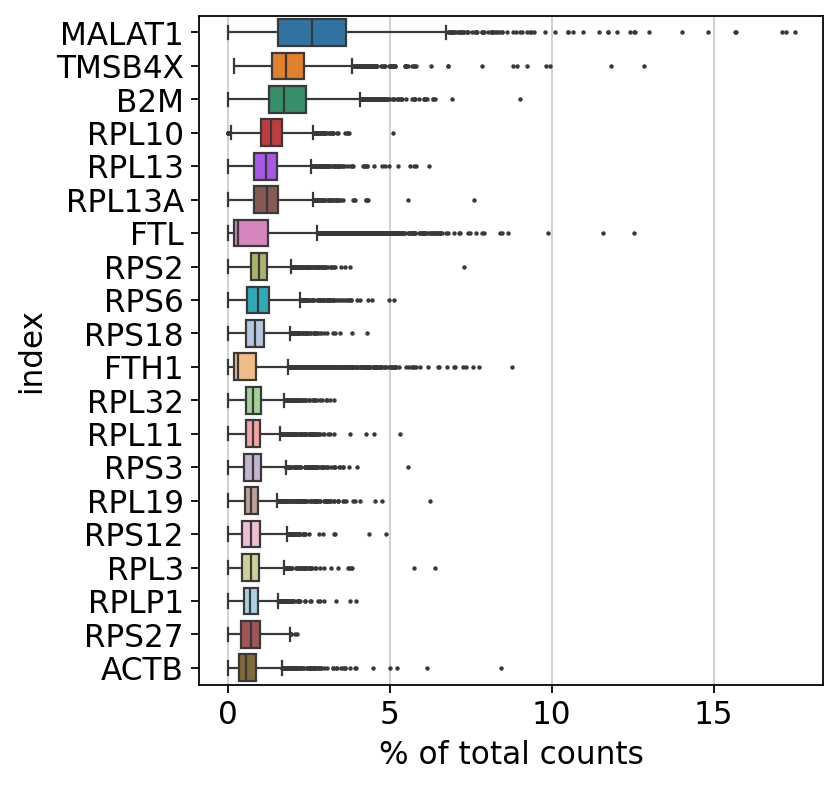

In [33]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [36]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [37]:
# 执行 PCA，使用 arpack 作为 svd_solver
sc.tl.pca(adata, svd_solver="arpack")


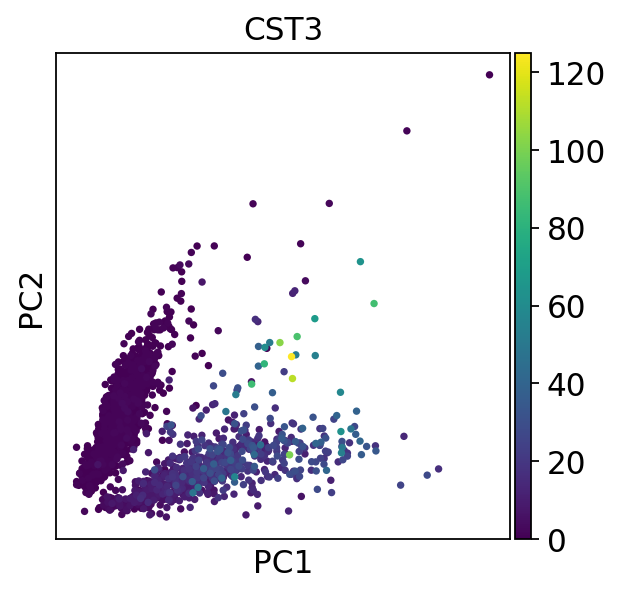

In [38]:
# 在 PCA 图中为基因 CST3 着色
sc.pl.pca(adata, color="CST3")


In [40]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

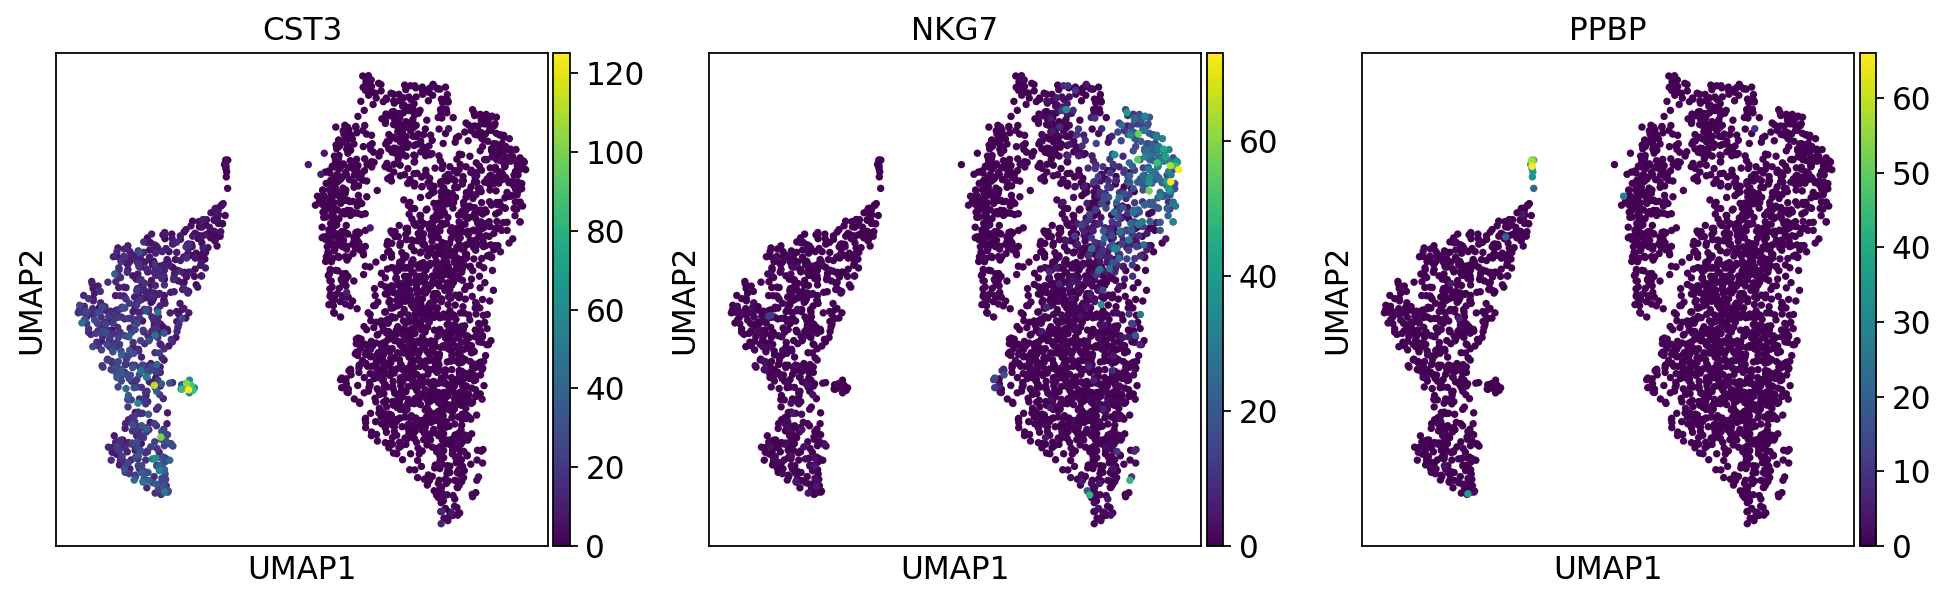

In [41]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"])